# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Recap on Frequentist and Bayesian Hypothesis Testing
Week 11 | Lesson 5.1

In [2]:
from __future__ import print_function, division
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
%matplotlib inline

## Some problems

Note that some of these were not directly covered in this recap but have been covered previously.

1) A hypothesis test is done in which the alternative hypothesis is that more than
10% of a population is left-handed. The p-value for the test is calculated to be
0.25. Which statement is correct?
- a) We can conclude that more than 10% of the population is left-handed.
- b) We can conclude that more than 25% of the population is left-handed.
- c) We can conclude that exactly 25% of the population is left-handed.
- d) We cannot conclude that more than 10% of the population is left-handed. 

In [ ]:
#d

2) A Type I error is committed when
- a) we reject a null hypothesis that is true.
- b) we don't reject a null hypothesis that is true.
- c) we reject a null hypothesis that is false.
- d) we don't reject a null hypothesis that is false. 

In [ ]:
# a

3) A Type II error is committed when
- a) we reject a null hypothesis that is true.
- b) we don't reject a null hypothesis that is true.
- c) we reject a null hypothesis that is false.
- d) we don't reject a null hypothesis that is false. 

In [ ]:
# d

4) A researcher has a theory that the average age of managers in a particular industry
is over 35-years-old, and he wishes to prove this. The null hypothesis to conduct
a statistical test on this theory would be:
- a) the population mean is < 35
- b) the population mean is >= 35
- c) the population mean is = 35
- d) the population mean is > 35 

In [ ]:
# d

5) A company believes that it controls more than 30% of the total market share for
one of its products. To prove this belief, a random sample of 144 purchases, of
this product are contacted. It is found that 50 of the 144 purchased this company's
brand of the product. If a researcher wants to conduct a statistical test for this
problem, the alternative hypothesis would be:

- a) the population proportion is less than 0.30
- b) the population proportion is greater than 0.30
- c) the population proportion is not equal to 0.30
- d) the population mean is less than 40 

In [ ]:
# b

6) A mileage test is conducted for a new car model, the “Pizzazz.” Thirty (n=30) random
selected Pizzazzes are driven for a month and the mileage is carefully measured in each and the samples are below. Estimate a 95% confidence interval for the mean mpg in the entire population of Pizzazzes. Note that the standard deviation for the population is not the standard deviation of the sample (look this up for the correction required). Note this is not a hypothesis test so there is not a question of Bayesian/frequentist equivalence.

In [81]:
samples6=[ 28.29,  27.28,  29.7 ,  25.67,  31.39,  28.93,  27.08,  25.59,
        32.55,  26.67,  26.59,  26.84,  33.23,  25.99,  25.63,  30.08,
        25.18,  28.05,  24.83,  29.44,  28.45,  29.93,  27.82,  30.55,
        29.6 ,  25.88,  25.4 ,  30.42,  27.55,  29.19]

In [82]:
distr3=stats.norm(loc=np.mean(samples), scale=np.std(samples)/np.sqrt(30))

In [92]:
distr3.cdf(27.33)

0.024126969648005397

In [95]:
distr3.cdf(28.91)

0.97393560992166794

7) Test the null hypothesis that the following geographic groupings of customers have the same conversion rate and investigate by frequentist and Bayesian approaches.

In [120]:
london=105*[0]+256*[1]
southeast=78*[0]+271*[1]
north=69*[0]+38*[1]
wales=20*[0]+20*[1]

In [122]:
stats.f_oneway(london, southeast, north, wales)

F_onewayResult(statistic=27.067983003413687, pvalue=9.9765852945954877e-17)

In [123]:
print(stats.ttest_ind(london, southeast, equal_var = False))
print(stats.ttest_ind(london, north, equal_var = False))
print(stats.ttest_ind(london, wales, equal_var = False))
print(stats.ttest_ind(southeast, north, equal_var = False))
print(stats.ttest_ind(southeast, wales, equal_var = False))
print(stats.ttest_ind(north, wales, equal_var = False))

Ttest_indResult(statistic=-2.0577734159861949, pvalue=0.039978484934167474)
Ttest_indResult(statistic=6.770917337768422, pvalue=2.1020523892306299e-10)
Ttest_indResult(statistic=2.5027212964169281, pvalue=0.015919811549757617)
Ttest_indResult(statistic=8.1711001688352347, pvalue=9.2501800208255771e-14)
Ttest_indResult(statistic=3.3265638306210876, pvalue=0.0017513725755220874)
Ttest_indResult(statistic=-1.5647238947785891, pvalue=0.12236442503210342)


In [124]:
# Based on Bonferonni correction looks like only london vs north, southeast vs north, southeast vs wales are distinct

In [127]:
with pm.Model():
    london_p = pm.Uniform('london_prob', lower=0, upper=1)
    southeast_p = pm.Uniform('southeast_prob', lower=0, upper=1)
    north_p = pm.Uniform('north_prob', lower=0, upper=1)
    wales_p = pm.Uniform('wales_prob', lower=0, upper=1)
    london_t = pm.Bernoulli('london', p=london_p, observed=london)
    southeast_t = pm.Bernoulli('southeast', p=southeast_p, observed=southeast)
    north_t = pm.Bernoulli('north', p=north_p, observed=north)
    wales_t = pm.Bernoulli('wales', p=wales_p, observed=wales)
    LvS = pm.Deterministic('LvS', london_p - southeast_p)
    LvN = pm.Deterministic('LvN', london_p - north_p)
    SvN = pm.Deterministic('SvN', southeast_p - north_p)
    SvW = pm.Deterministic('SvW', southeast_p - wales_p)
    NvW = pm.Deterministic('NvW', north_p - wales_p)
    start=pm.find_MAP()
    trace = pm.sample(10000, start=start)

Applied interval-transform to london_prob and added transformed london_prob_interval_ to model.
Applied interval-transform to southeast_prob and added transformed southeast_prob_interval_ to model.
Applied interval-transform to north_prob and added transformed north_prob_interval_ to model.
Applied interval-transform to wales_prob and added transformed wales_prob_interval_ to model.
Assigned NUTS to london_prob_interval_
Assigned NUTS to southeast_prob_interval_
Assigned NUTS to north_prob_interval_
Assigned NUTS to wales_prob_interval_
100%|██████████| 10000/10000 [00:10<00:00, 948.12it/s]


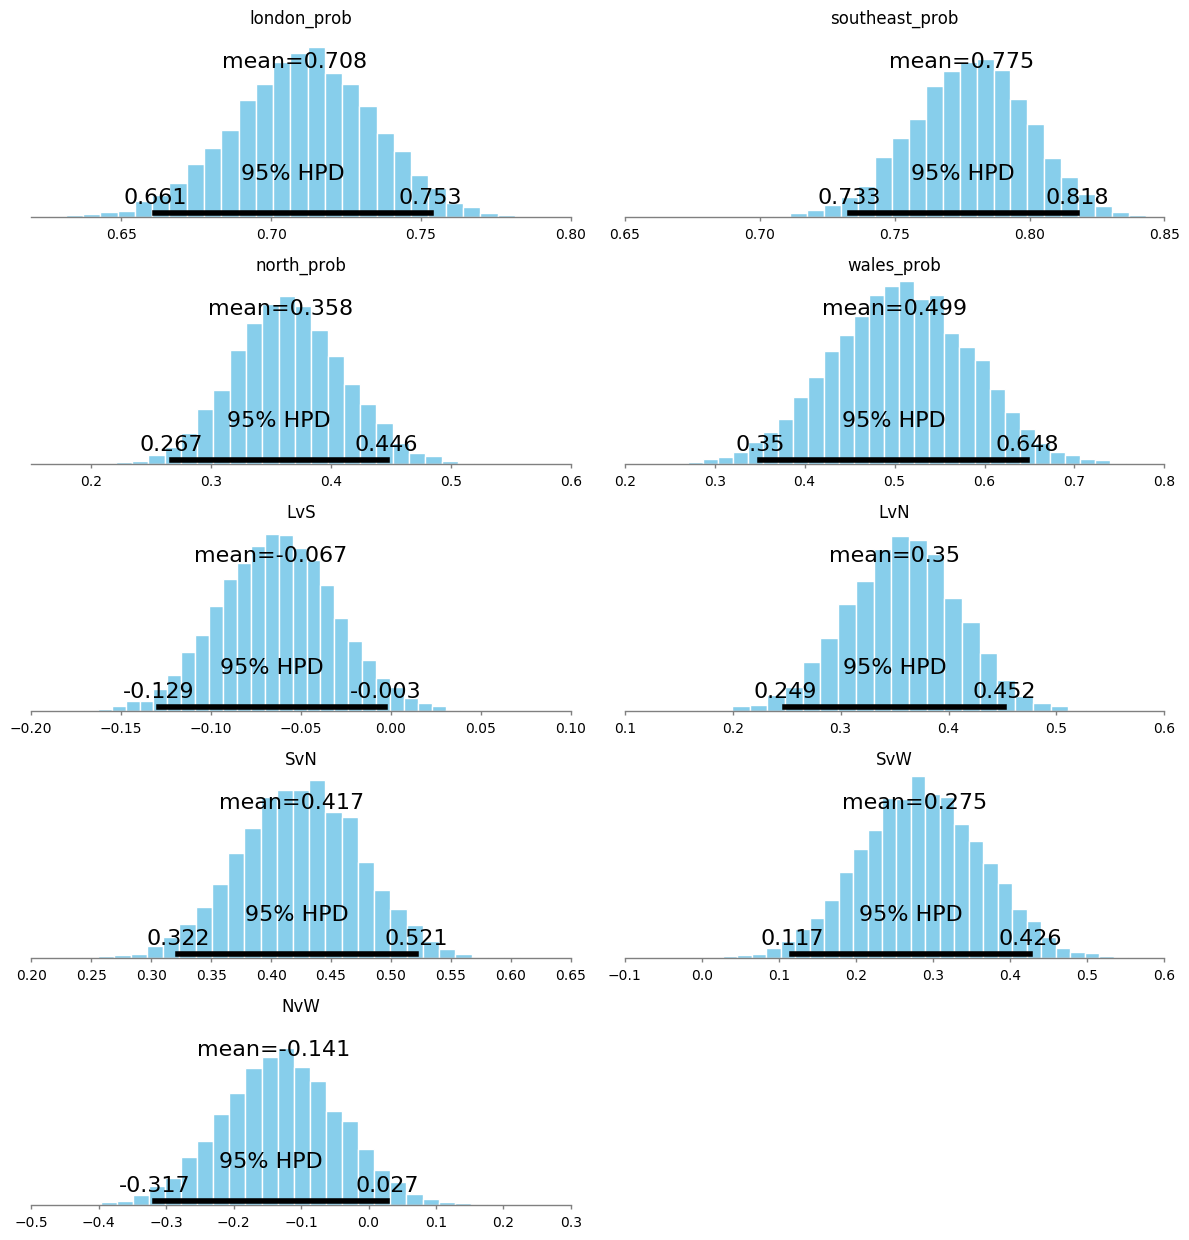

In [128]:
pm.plot_posterior(trace[1000:], color='#87ceeb')
plt.show()

In [ ]:
# same as frequentist, though London vs Southeast is now potentially a marginal case